6장 코드

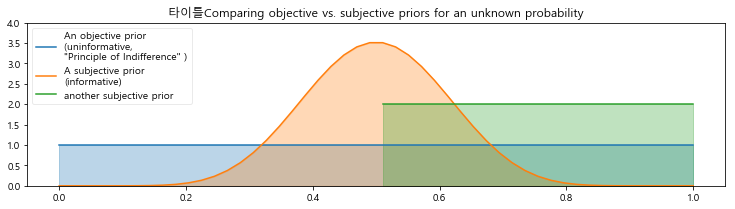

In [1]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')  # 그림 한글 폰트 지정, 맑은 고딕

figsize(12.5, 3)
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

x = np.linspace(0, 1)
y1, y2 = stats.beta.pdf(x, 1, 1), stats.beta.pdf(x, 10, 10)

p = plt.plot(x, y1,
             label='An objective prior \n(uninformative, \n"Principle of Indifference" )')
plt.fill_between(x, 0, y1, color=p[0].get_color(), alpha=0.3)

p = plt.plot(x, y2,
             label="A subjective prior \n(informative)")
plt.fill_between(x, 0, y2, color=p[0].get_color(), alpha=0.3)

p = plt.plot(x[25:], 2 * np.ones(25), label="another subjective prior")
plt.fill_between(x[25:], 0, 2, color=p[0].get_color(), alpha=0.3)

plt.ylim(0, 4)

plt.ylim(0, 4)
leg = plt.legend(loc="upper left")
leg.get_frame().set_alpha(0.4)
plt.title("타이틀Comparing objective vs. subjective priors for an unknown probability");

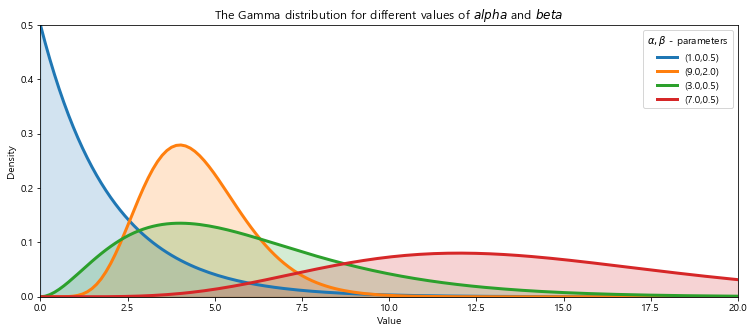

In [2]:
figsize(12.5, 5)
gamma = stats.gamma
parameters = [(1, 0.5), (9, 2), (3, 0.5), (7, 0.5)]
x = np.linspace(0.001, 20, 150)
for alpha, beta in parameters:
    y = gamma.pdf(x, alpha, scale=1./beta)
    lines = plt.plot(x, y, label="(%.1f,%.1f)"%(alpha,beta), lw=3)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
    plt.autoscale(tight=True)
    
plt.legend(title=r"$\alpha, \beta$ - parameters")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title=r"$\alpha, \beta$ - parameters");
plt.title("The Gamma distribution for different values of $alpha$ and $beta$");

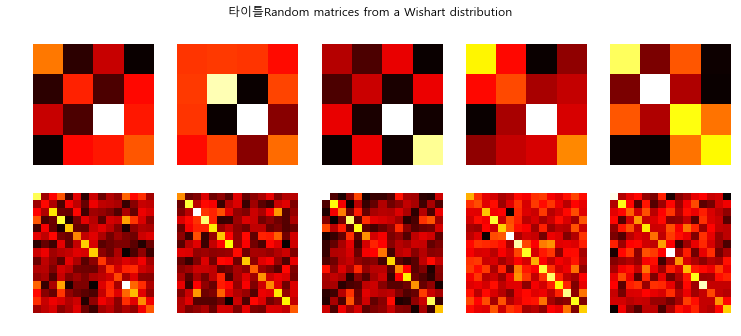

In [3]:
import pymc as pm
n = 4
hyperparameter = np.eye(n)
for i in range(5):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(pm.rwishart(n+1, hyperparameter), interpolation="none",
    cmap=plt.cm.hot)
    ax.axis("off")
n = 15
hyperparameter = 10*np.eye(n)
for i in range(5, 10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(pm.rwishart(n+1, hyperparameter), interpolation="none",
    cmap=plt.cm.hot)
    ax.axis("off")    
plt.suptitle("타이틀Random matrices from a Wishart distribution");


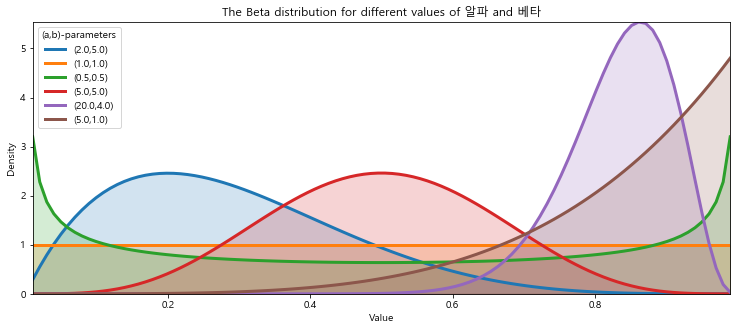

In [4]:
figsize(12.5, 5)
params = [(2,5), (1,1), (0.5, 0.5), (5, 5), (20, 4), (5, 1)]
x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label="(%.1f,%.1f)"%(a,b), lw = 3)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
    plt.autoscale(tight=True)
    
plt.ylim(0)
plt.legend(loc='upper left', title="(a,b)-parameters")
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("The Beta distribution for different values of 알파 and 베타");

In [5]:
from pymc import rbeta


class Bandits(object):

    """
    This class represents N bandits machines.

    parameters:
        p_array: a (n,) Numpy array of probabilities >0, <1.

    methods:
        pull( i ): return the results, 0 or 1, of pulling 
                   the ith bandit.
    """

    def __init__(self, p_array):
        self.p = p_array
        self.optimal = np.argmax(p_array)

    def pull(self, i):
        # i is which arm to pull
        return np.random.rand() < self.p[i]

    def __len__(self):
        return len(self.p)


class BayesianStrategy(object):

    """
    Implements a online, learning strategy to solve
    the Multi-Armed Bandit problem.
    
    parameters:
        bandits: a Bandit class with .pull method
    
    methods:
        sample_bandits(n): sample and train on n pulls.

    attributes:
        N: the cumulative number of samples
        choices: the historical choices as a (N,) array
        bb_score: the historical score as a (N,) array
    """

    def __init__(self, bandits):

        self.bandits = bandits
        n_bandits = len(self.bandits)
        self.wins = np.zeros(n_bandits)
        self.trials = np.zeros(n_bandits)
        self.N = 0
        self.choices = []
        self.bb_score = []

    def sample_bandits(self, n=1):

        bb_score = np.zeros(n)
        choices = np.zeros(n)

        for k in range(n):
            # sample from the bandits's priors, and select the largest sample
            choice = np.argmax(rbeta(1 + self.wins, 1 + self.trials - self.wins))

            # sample the chosen bandit
            result = self.bandits.pull(choice)

            # update priors and score
            self.wins[choice] += result
            self.trials[choice] += 1
            bb_score[k] = result
            self.N += 1
            choices[k] = choice

        self.bb_score = np.r_[self.bb_score, bb_score]
        self.choices = np.r_[self.choices, choices]
        return

In [6]:

figsize(11.0, 10)

beta = stats.beta
x = np.linspace(0.001, .999, 200)


def plot_priors(bayesian_strategy, prob, lw=3, alpha=0.2, plt_vlines=True):
    # plotting function
    wins = bayesian_strategy.wins
    trials = bayesian_strategy.trials
    for i in range(prob.shape[0]):
        y = beta(1 + wins[i], 1 + trials[i] - wins[i])
        p = plt.plot(x, y.pdf(x), lw=lw)
        c = p[0].get_markeredgecolor()
        plt.fill_between(x, y.pdf(x), 0, color=c, alpha=alpha,
                         label="underlying probability: %.2f" % prob[i])
        if plt_vlines:
            plt.vlines(prob[i], 0, y.pdf(prob[i]),
                       colors=c, linestyles="--", lw=2)
        plt.autoscale(tight="True")
        plt.title(" 한글 테스트 Posteriors After %d pull" % bayesian_strategy.N +
                  "s" * (bayesian_strategy.N > 1))
        plt.autoscale(tight=True)
    return

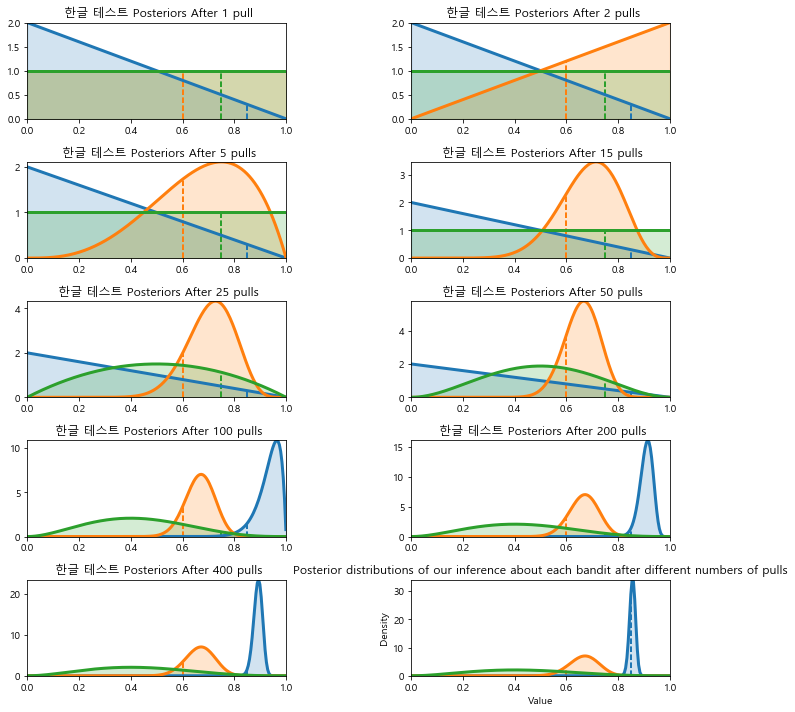

In [7]:
hidden_prob = np.array([0.85, 0.60, 0.75])
bandits = Bandits(hidden_prob)
bayesian_strat = BayesianStrategy(bandits)

draw_samples = [1, 1, 3, 10, 10, 25, 50, 100, 200, 600]

for j, i in enumerate(draw_samples):
    plt.subplot(5, 2, j + 1)
    bayesian_strat.sample_bandits(i)
    plot_priors(bayesian_strat, hidden_prob)
    # plt.legend()
    plt.autoscale(tight=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distributions of our inference about each bandit after different numbers of pulls")
plt.tight_layout()

In [8]:

#from IPython.core.display import HTML

# try executing the below command twice if the first time doesn't work
#HTML(filename="BanditsD3.html")

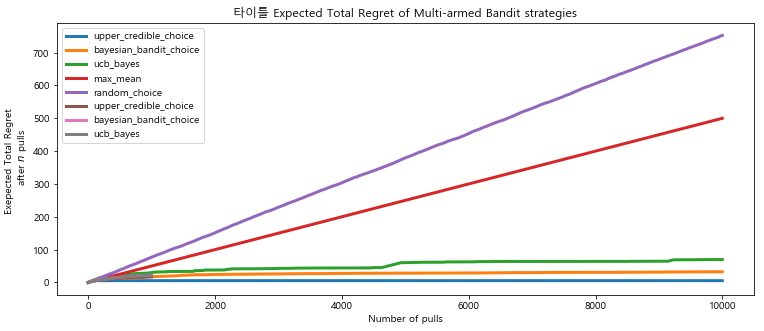

In [28]:
figsize(12.5, 5)
from other_strats import GeneralBanditStrat, bayesian_bandit_choice, max_mean, lower_credible_choice, \
                         upper_credible_choice, random_choice, ucb_bayes, Bandits

# define a harder problem
hidden_prob = np.array([0.15, 0.2, 0.1, 0.05])
bandits = Bandits(hidden_prob)

# define regret


def regret(probabilities, choices):
    w_opt = probabilities.max()
    return (w_opt - probabilities[choices.astype(int)]).cumsum()

# create new strategies
strategies = [upper_credible_choice,
              bayesian_bandit_choice,
              ucb_bayes,
              max_mean,
              random_choice]
algos = []
for strat in strategies:
    algos.append(GeneralBanditStrat(bandits, strat))
# train 10000 times
for strat in algos:
    strat.sample_bandits(10000)

#test and plot
for i, strat in enumerate(algos):
    _regret = regret(hidden_prob, strat.choices)
    plt.plot(_regret, label=strategies[i].__name__, lw=3)

plt.title("Total Regret of Bayesian Bandits Strategy vs. Random guessing")
plt.xlabel("Number of pulls")
plt.ylabel("Regret after $n$ pulls");
plt.legend(loc="upper left");
# this can be slow, so I recommend NOT running it.
trials = 200
expected_total_regret = np.zeros((1000, 3))

for i_strat, strat in enumerate(strategies[:-2]):
    for i in range(trials):
        general_strat = GeneralBanditStrat(bandits, strat)
        general_strat.sample_bandits(1000)
        _regret = regret(hidden_prob, general_strat.choices)
        expected_total_regret[:, i_strat] += _regret

    plt.plot(expected_total_regret[:, i_strat] / trials, lw=3, label=strat.__name__)

plt.title("타이틀 Expected Total Regret of Multi-armed Bandit strategies")
plt.xlabel("Number of pulls")
plt.ylabel("Exepected Total Regret \n after $n$ pulls");
plt.legend(loc="upper left");

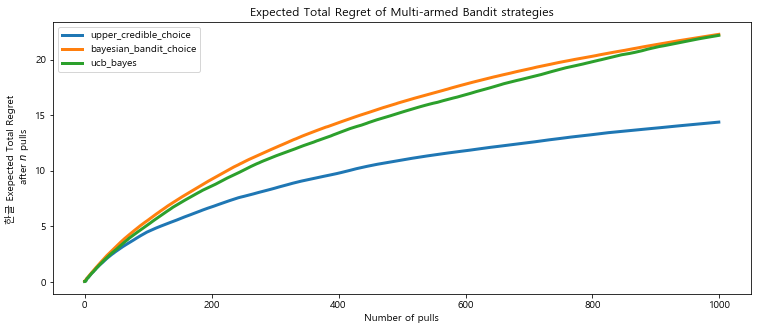

In [10]:
# this can be slow, so I recommend NOT running it.
trials = 200
expected_total_regret = np.zeros((1000, 3))

for i_strat, strat in enumerate(strategies[:-2]):
    for i in range(trials):
        general_strat = GeneralBanditStrat(bandits, strat)
        general_strat.sample_bandits(1000)
        _regret = regret(hidden_prob, general_strat.choices)
        expected_total_regret[:, i_strat] += _regret

    plt.plot(expected_total_regret[:, i_strat] / trials, lw=3, label=strat.__name__)

plt.title("Expected Total Regret of Multi-armed Bandit strategies")
plt.xlabel("Number of pulls")
plt.ylabel("한글 Exepected Total Regret \n after $n$ pulls");
plt.legend(loc="upper left");

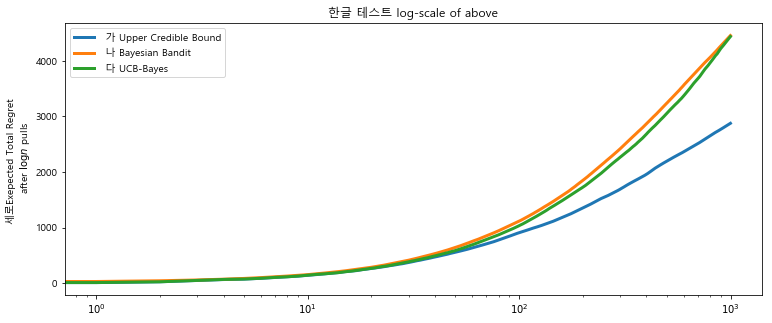

In [11]:
plt.figure()
[pl1, pl2, pl3] = plt.plot(expected_total_regret[:, [0, 1, 2]], lw=3)
plt.xscale("log")
plt.legend([pl1, pl2, pl3],
           [" 가 Upper Credible Bound", " 나 Bayesian Bandit", " 다 UCB-Bayes"],
           loc="upper left")
plt.ylabel("Exepected Total Regret \n after $\log{n}$ pulls");
plt.title("한글 테스트 log-scale of above");
plt.ylabel("세로Exepected Total Regret \n after $\log{n}$ pulls");

[ 0.01693868  0.03940092  0.10039408  0.02614451  0.04301675  0.01580043
  0.04004514  0.01701805  0.16763955  0.00414053  0.07151535  0.06269296
  0.08426672  0.06427546  0.14924246  0.02172569  0.00758532  0.06829666
  0.03552185  0.04895009  0.13197516  0.04377354  0.0075698   0.04873578
  0.03058356  0.045324    0.02069776  0.02891979  0.18407153  0.02536513
  0.04840425  0.05387449  0.10681916  0.03714827  0.07574197]


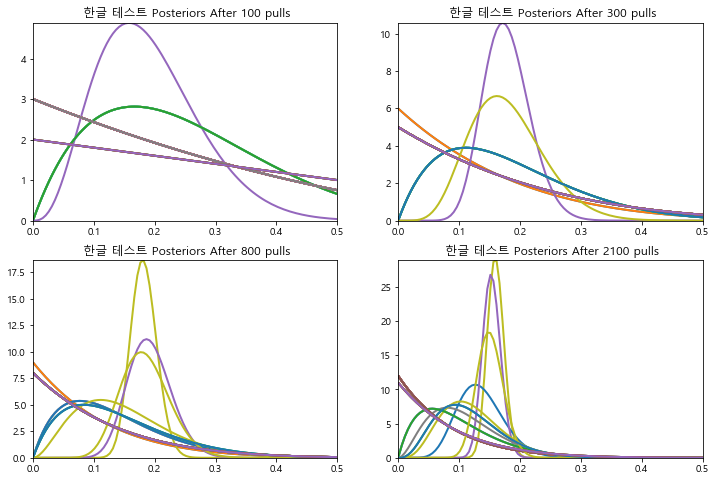

In [12]:
figsize(12.0, 8)
beta = stats.beta
hidden_prob = beta.rvs(1,13, size=35)
print (hidden_prob)
bandits = Bandits(hidden_prob)
bayesian_strat = BayesianStrategy(bandits)
for j,i in enumerate([100, 200, 500, 1300]):
    plt.subplot(2, 2, j+1)
    bayesian_strat.sample_bandits(i)
    plot_priors(bayesian_strat, hidden_prob, lw = 2, alpha = 0.0,
        plt_vlines=False)
    plt.xlim(0, 0.5)

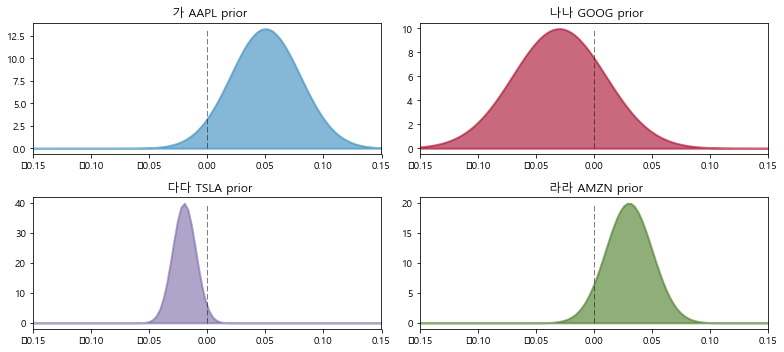

In [13]:
figsize(11., 5)
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821"]

normal = stats.norm
x = np.linspace(-0.15, 0.15, 100)

expert_prior_params = {" 가 AAPL": (0.05, 0.03),
                       " 나나 GOOG": (-0.03, 0.04),
                       " 다다 TSLA": (-0.02, 0.01),
                       " 라라 AMZN": (0.03, 0.02),
                       }

for i, (name, params) in enumerate(expert_prior_params.items()):
    plt.subplot(2, 2, i + 1)
    y = normal.pdf(x, params[0], scale=params[1])
    #plt.plot( x, y, c = colors[i] )
    plt.fill_between(x, 0, y, color=colors[i], linewidth=2,
                     edgecolor=colors[i], alpha=0.6)
    plt.title(name + " prior")
    plt.vlines(0, 0, y.max(), "k", "--", linewidth=0.5)
    plt.xlim(-0.15, 0.15)
plt.tight_layout()

In [14]:
import pymc as pm

n_observations = 100  # we will truncate the the most recent 100 days.

prior_mu = np.array([x[0] for x in expert_prior_params.values()])
prior_std = np.array([x[1] for x in expert_prior_params.values()])

inv_cov_matrix = pm.Wishart("inv_cov_matrix", n_observations, np.diag(prior_std ** 2))
mu = pm.Normal("returns", prior_mu, 1, size=4)

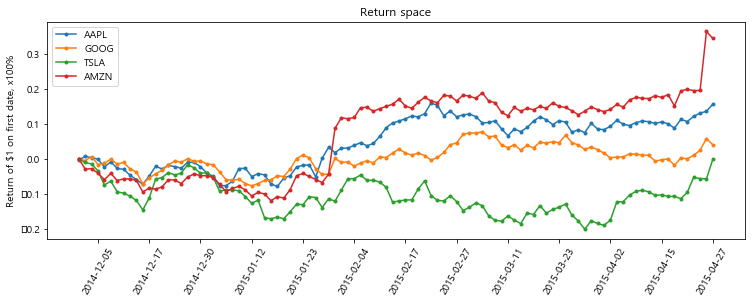

In [15]:
# I wish I could have used Pandas as a prereq for this book, but oh well.
import datetime
import ystockquote as ysq

stocks = ["AAPL", "GOOG", "TSLA", "AMZN"]

enddate = "2015-04-27"
startdate = "2012-09-01"

stock_closes = {}
stock_returns = {}
CLOSE = 6

for stock in stocks:
    x = np.array(ysq.get_historical_prices(stock, startdate, enddate))
    stock_closes[stock] = x[1:, CLOSE].astype(float)

# create returns:

for stock in stocks:
    _previous_day = np.roll(stock_closes[stock], -1)
    stock_returns[stock] = ((stock_closes[stock] - _previous_day) / _previous_day)[:n_observations]

dates = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"), x[1:n_observations + 1, 0]))

figsize(12.5, 4)

for _stock, _returns in stock_returns.items():
    p = plt.plot((1 + _returns)[::-1].cumprod() - 1, '-o', label="%s" % _stock,
                 markersize=4, markeredgecolor="none")

plt.xticks(np.arange(100)[::-8],
           list(map(lambda x: datetime.datetime.strftime(x, "%Y-%m-%d"), dates[::8])),
           rotation=60);

plt.legend(loc="upper left")
plt.title("Return space")
plt.ylabel("Return of $1 on first date, x100%");



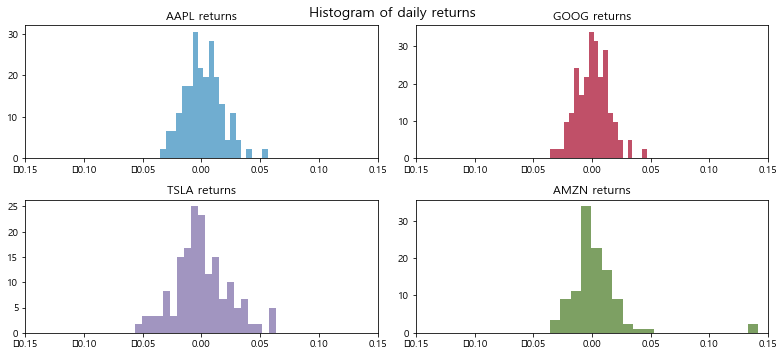

In [16]:
figsize(11.0, 5)
returns = np.zeros((n_observations, 4))

for i, (_stock, _returns) in enumerate(stock_returns.items()):
    returns[:, i] = _returns
    plt.subplot(2, 2, i+1)
    plt.hist(_returns, bins=20,
             normed=True, histtype="stepfilled",
             color=colors[i], alpha=0.7)
    plt.title(_stock + " returns")
    plt.xlim(-0.15, 0.15)

plt.tight_layout()
plt.suptitle("Histogram of daily returns", size=14);

In [17]:
obs = pm.MvNormal("observed returns", mu, inv_cov_matrix, observed=True, value=returns)

model = pm.Model([obs, mu, inv_cov_matrix])
mcmc = pm.MCMC()

mcmc.sample(150000, 100000, 3)

C:\Users\jieun\Anaconda3\lib\site-packages\pymc\Model.py:94: UserWarning: The MCMC() syntax is deprecated. Please pass in nodes explicitly via M = MCMC(input).
  'The MCMC() syntax is deprecated. Please pass in nodes explicitly via M = MCMC(input).')


 [-----------------100%-----------------] 150000 of 150000 complete in 84.6 sec

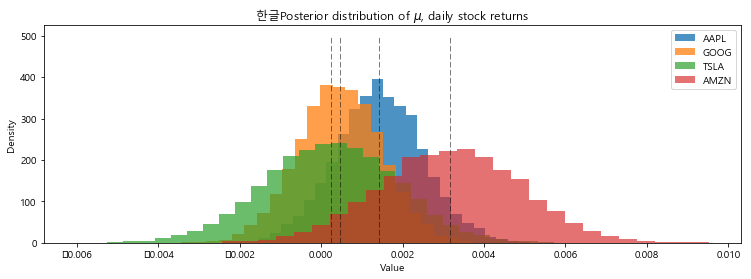

In [18]:
figsize(12.5, 4)

# examine the mean return first.
mu_samples = mcmc.trace("returns")[:]

for i in range(4):
    plt.hist(mu_samples[:, i], alpha=0.8 - 0.05 * i, bins=30,
             histtype="stepfilled", normed=True,
             label="%s" % list(stock_returns.keys())[i])

plt.vlines(mu_samples.mean(axis=0), 0, 500, linestyle="--", linewidth=.5)

plt.title("한글Posterior distribution of $\mu$, daily stock returns")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend();

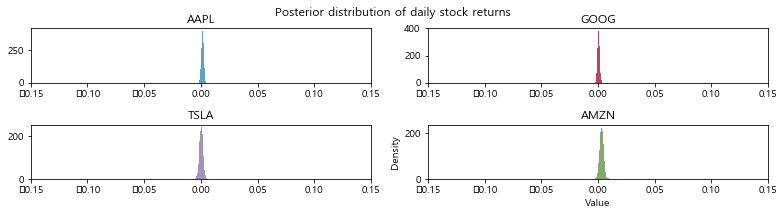

In [19]:
figsize(11.0, 3)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.hist(mu_samples[:, i], alpha=0.8 - 0.05 * i, bins=30,
             histtype="stepfilled", normed=True, color=colors[i],
             label="%s" % list(stock_returns.keys())[i])
    plt.title("%s" % list(stock_returns.keys())[i])
    plt.xlim(-0.15, 0.15)

plt.suptitle("Posterior distribution of daily stock returns")
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout()

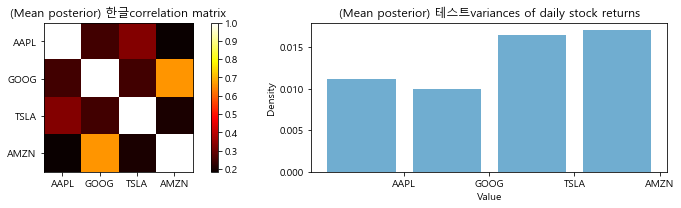

In [20]:
inv_cov_samples = mcmc.trace("inv_cov_matrix")[:]
mean_covariance_matrix = np.linalg.inv(inv_cov_samples.mean(axis=0))
def cov2corr(A):
    """
    covariance matrix to correlation matrix
    """
    d = np.sqrt(A.diagonal())
    A = ((A.T/d).T)/d
    return A
plt.subplot(1,2,1)
plt.imshow(cov2corr(mean_covariance_matrix), interpolation="none",
    cmap = plt.cm.hot)
plt.xticks(np.arange(4), stock_returns.keys())
plt.yticks(np.arange(4), stock_returns.keys())
plt.colorbar(orientation="vertical")
plt.title("(Mean posterior) 한글correlation matrix")
plt.subplot(1,2,2)
plt.bar(np.arange(4), np.sqrt(np.diag(mean_covariance_matrix)),
    color="#348ABD", alpha=0.7)
plt.xticks(np.arange(4) + 0.5, stock_returns.keys());
plt.title("(Mean posterior) 테스트variances of daily stock returns")
plt.xlabel('Value')
plt.ylabel('Density')
plt.tight_layout();

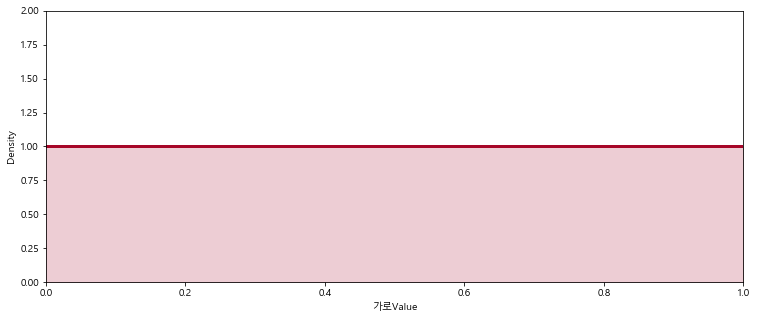

In [21]:
figsize(12.5, 5)
x = np.linspace(0.000, 1, 150)
y = np.linspace(1.0, 1.0, 150)
lines = plt.plot(x, y, color="#A60628", lw=3)
plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
plt.autoscale(tight=True)
plt.xlabel('가로Value')
plt.ylabel('Density')
plt.ylim(0, 2);

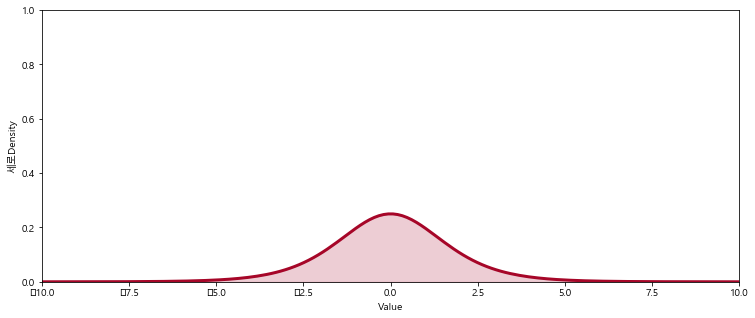

In [22]:
figsize(12.5, 5)
psi = np.linspace(-10, 10, 150)
y = np.exp(psi) / (1 + np.exp(psi))**2
lines = plt.plot(psi, y, color="#A60628", lw = 3)
plt.fill_between(psi, 0, y, alpha = 0.2, color = lines[0].get_color())
plt.autoscale(tight=True)
plt.xlabel('Value')
plt.ylabel('세로Density')
plt.ylim(0, 1);

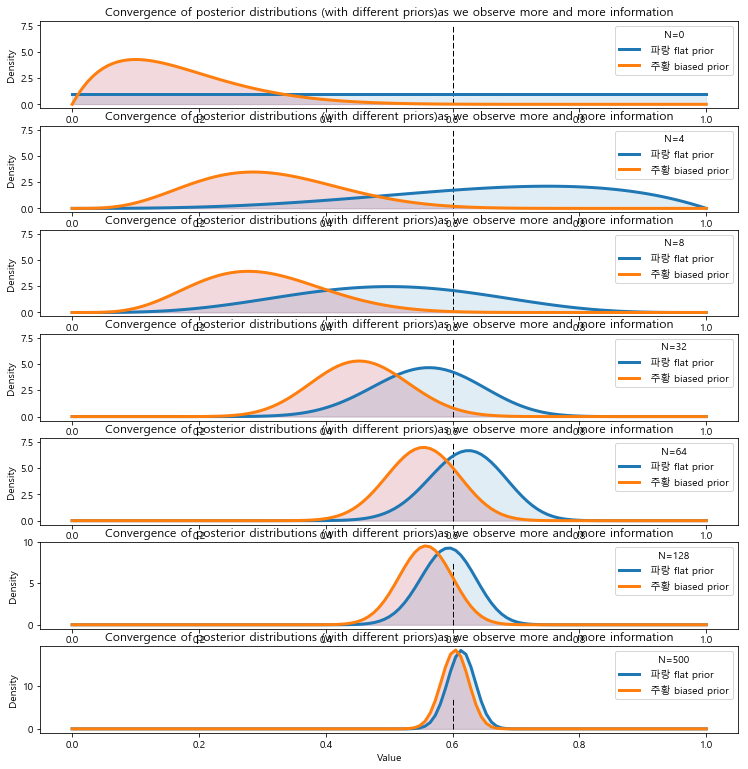

In [23]:
figsize(12.5, 15)

p = 0.6
beta1_params = np.array([1., 1.])
beta2_params = np.array([2, 10])
beta = stats.beta

x = np.linspace(0.00, 1, 125)
data = pm.rbernoulli(p, size=500)

plt.figure()
for i, N in enumerate([0, 4, 8, 32, 64, 128, 500]):
    s = data[:N].sum()
    plt.subplot(8, 1, i + 1)
    params1 = beta1_params + np.array([s, N - s])
    params2 = beta2_params + np.array([s, N - s])
    y1, y2 = beta.pdf(x, *params1), beta.pdf(x, *params2)
    plt.plot(x, y1, label=r" 파랑 flat prior", lw=3)
    plt.plot(x, y2, label=" 주황 biased prior", lw=3)
    plt.fill_between(x, 0, y1, color="#348ABD", alpha=0.15)
    plt.fill_between(x, 0, y2, color="#A60628", alpha=0.15)
    plt.legend(title="N=%d" % N)
    plt.vlines(p, 0.0, 7.5, linestyles="--", linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title("Convergence of posterior distributions (with different priors)as we observe more and more information")
    #plt.ylim( 0, 10)#


In [24]:
p_actual = 0.35
x = np.random.binomial(1, p_actual, size=100)
print (x[:10])

[0 1 0 0 0 1 0 0 0 0]


In [25]:
import pymc as pm
p = pm.Uniform('p', 0.5, 1)
obs = pm.Bernoulli('obs', p, value=x, observed=True)
mcmc = pm.MCMC([p, obs])
mcmc.sample(10000, 2000)

 [-----------------100%-----------------] 10000 of 10000 complete in 0.3 sec

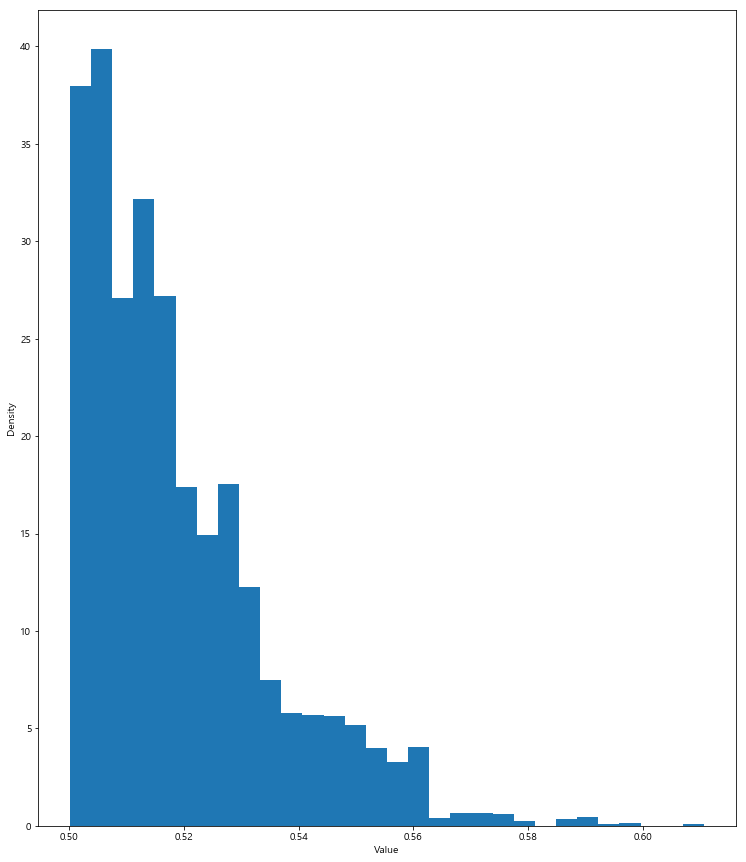

In [26]:
p_trace = mcmc.trace('p')[:]
plt.xlabel('Value')
plt.ylabel('Density')
plt.hist(p_trace, bins=30, histtype='stepfilled', normed=True);